In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Time Series Data

In [ ]:
new_df = df[['dteday','cnt']]
new_df.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [ ]:
new_df['dteday'] = pd.to_datetime(new_df['dteday'])
new_df.set_index('dteday',inplace=True)
new_df.head()

<ipython-input-55-4440380d2103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dteday'] = pd.to_datetime(new_df['dteday'])


,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


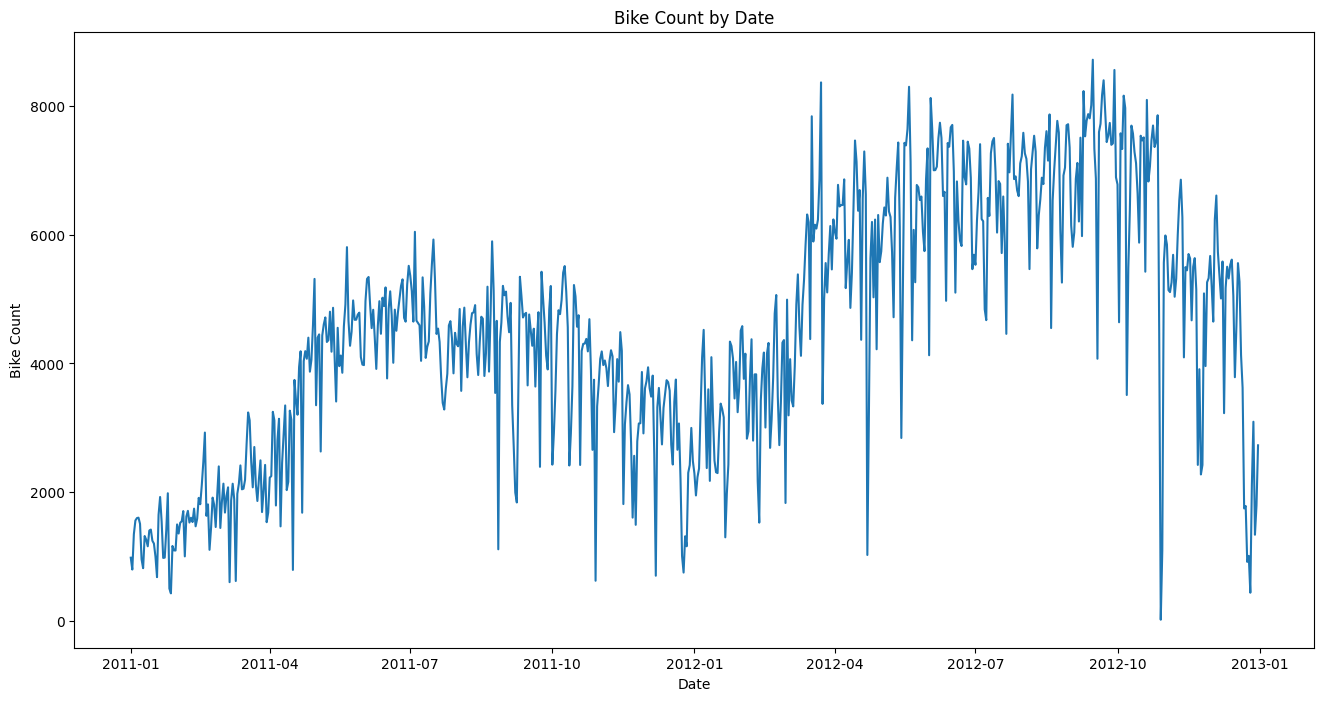

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Bike Count by Date')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df)
plt.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.3 MB/s eta 0:00:00


In [ ]:
new_df['log_cnt'] = np.log(new_df['cnt'])
count = new_df['cnt']
new_df.drop('cnt',axis=1,inplace=True)
new_df.head()

<ipython-input-57-97fbb94a6a4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['log_cnt'] = np.log(new_df['cnt'])
<ipython-input-57-97fbb94a6a4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('cnt',axis=1,inplace=True)


,log_cnt
dteday,
2011-01-01,6.892642
2011-01-02,6.685861
2011-01-03,7.207119
2011-01-04,7.353722
2011-01-05,7.377759


Data Split

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_df, test_size=0.2, shuffle=False)

In [ ]:
import pmdarima as pm
ARIMA_model = pm.auto_arima(train_data['log_cnt'],start_p=1,start_q=1,max_p=3,max_q=3,m=0,start_P=0,seasonal=False,d=1,D=1,trace=True,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=192.709, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=405.655, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=330.197, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=219.573, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=403.711, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=194.180, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=194.222, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=192.866, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=286.202, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=195.054, Time=1.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=194.285, Time=0.15 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 4.127 seconds


In [ ]:
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  584
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -92.355
Date:                Fri, 22 Nov 2024   AIC                            192.709
Time:                        08:04:29   BIC                            210.182
Sample:                    01-01-2011   HQIC                           199.520
                         - 08-06-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0023      0.002      1.416      0.157      -0.001       0.005
ar.L1          0.2523      0.044      5.780      0.000       0.167       0.338
ma.L1         -0.9033      0.025    -36.158      0.000      -0.952      -0.854
sigma2         0.0802      0.003     29.539      0.000       0.075       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2784.00
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -2.28
Prob(H) (two-sided):                  0.03   Kurtosis:                        12.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = np.exp(ARIMA_model.predict(n_periods=len(test_data)))

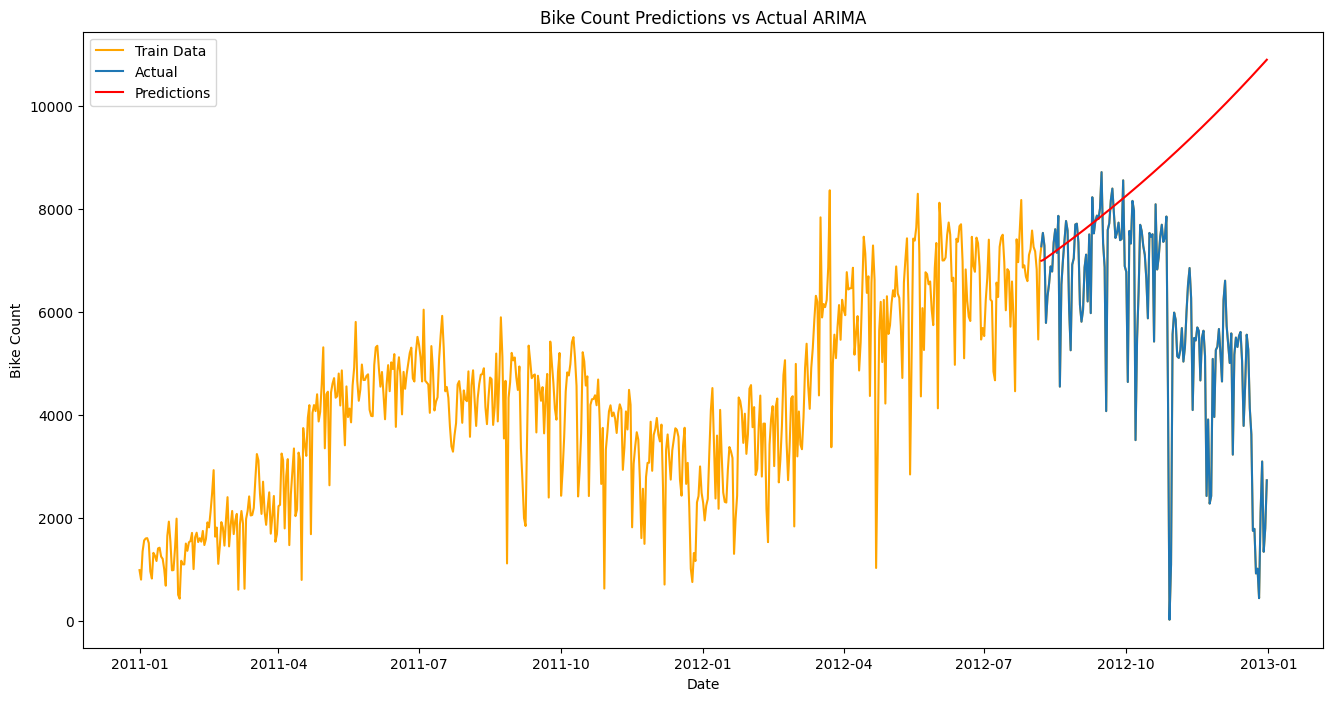

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Bike Count Predictions vs Actual ARIMA')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df.index,count, label='Train Data', color='orange')
plt.plot(test_data.index, np.exp(test_data.values), label='Actual')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(np.exp(test_data), predictions))
mae = mean_absolute_error(np.exp(test_data), predictions)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 4008.359713800078
MAE: 2978.8590373578054


SARIMA (m=7) Weekly

In [ ]:
SARIMA_model = pm.auto_arima(
       train_data['log_cnt'],
       start_p=1,
       start_q=1,
       max_p=3,
       max_q=3,
       m=7,  # Seasonal period
       start_P=0,
       seasonal=True,
       d=1,
       D=1,
       trace=True,
       error_action='ignore',
       suppress_warnings=True
   )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=841.548, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=565.658, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=745.094, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=484.285, Time=0.48 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=2.70 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=566.629, Time=0.26 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=451.780, Time=0.56 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=528.560, Time=0.33 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=2.41 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=3.47 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=426.219, Time=0.59 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=504.570, Time=0.35 sec
 ARIMA

In [ ]:
SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 7)   Log Likelihood                -165.534
Date:                            Fri, 22 Nov 2024   AIC                            341.068
Time:                                    08:06:49   BIC                            362.848
Sample:                                01-01-2011   HQIC                           349.562
                                     - 08-06-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3092      0.034      9.107      0.000       0.243       0.376
ma.L1         -0.9822      0.010   -102.077      0.000      -1.001      -0.963
ar.S.L7       -0.6921      0.029    -23.726      0.000      -0.749      -0.635
ar.S.L14      -0.3497      0.031    -11.448      0.000      -0.410      -0.290
sigma2         0.1026      0.003     35.014      0.000       0.097       0.108
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              1263.65
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -1.50
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions2 = np.exp(SARIMA_model.predict(n_periods=len(test_data)))

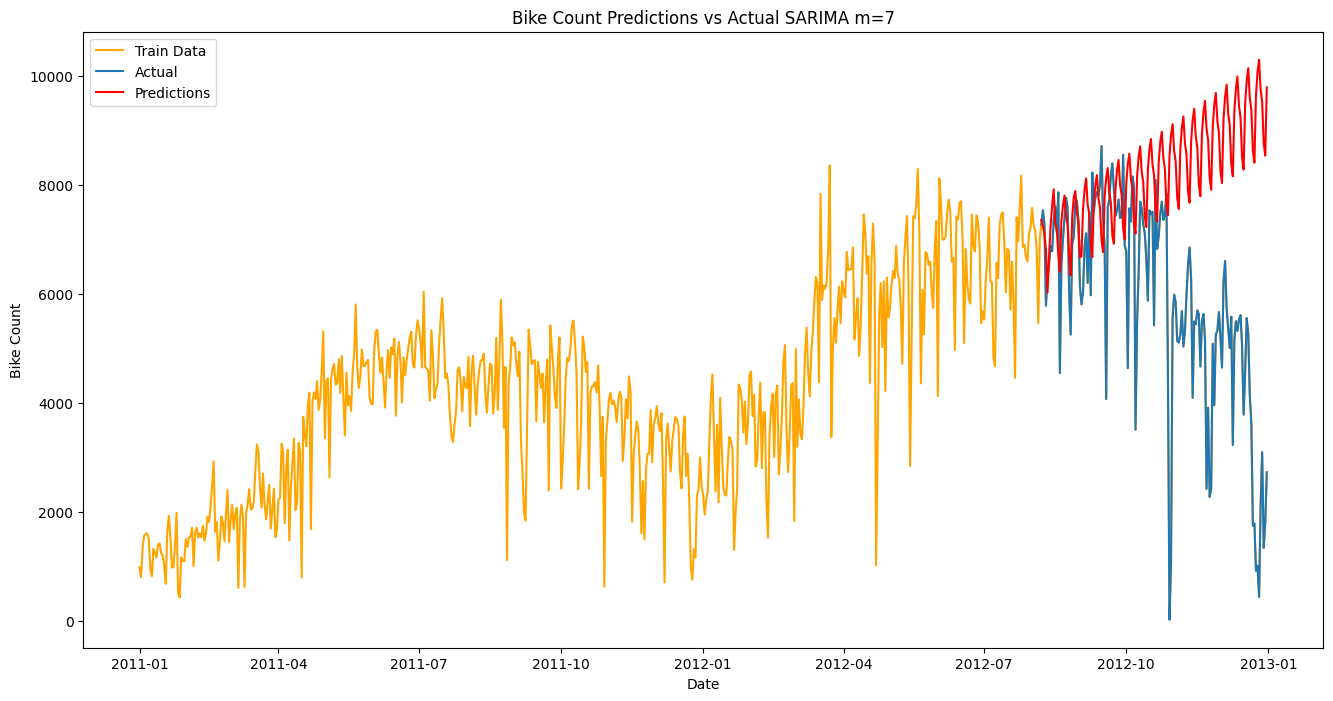

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Bike Count Predictions vs Actual SARIMA m=7')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df.index,count, label='Train Data', color='orange')
plt.plot(test_data.index, np.exp(test_data.values), label='Actual')
plt.plot(test_data.index, predictions2, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(np.exp(test_data), predictions2))
mae = mean_absolute_error(np.exp(test_data), predictions2)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 3381.388914723201
MAE: 2501.1708763262923


SARIMA m = 12 (monthly)

In [ ]:
SARIMA_model2 = pm.auto_arima(
       train_data['log_cnt'],
       start_p=1,
       start_q=1,
       max_p=3,
       max_q=3,
       m=12,  # Seasonal period
       start_P=0,
       seasonal=True,
       d=1,
       D=1,
       trace=True,
       error_action='ignore',
       suppress_warnings=True
   )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=798.186, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=569.791, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=733.588, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=504.754, Time=2.48 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.48 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.78 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=574.665, Time=0.50 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=470.737, Time=2.93 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=526.307, Time=0.72 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=13.03 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.97 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=428.026, Time=1.20 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=498.958, Time

In [ ]:
SARIMA_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  584
Model:             SARIMAX(3, 1, 3)x(2, 1, [], 12)   Log Likelihood                -161.326
Date:                             Fri, 22 Nov 2024   AIC                            340.652
Time:                                     08:15:53   BIC                            379.779
Sample:                                 01-01-2011   HQIC                           355.917
                                      - 08-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4139      0.045    -31.251      0.000      -1.503      -1.325
ar.L2         -0.5085      0.068     -7.463      0.000      -0.642      -0.375
ar.L3          0.1979      0.041      4.868      0.000       0.118       0.278
ma.L1          0.7788      0.029     26.982      0.000       0.722       0.835
ma.L2         -0.6563      0.031    -21.416      0.000      -0.716      -0.596
ma.L3         -0.9281      0.027    -34.768      0.000      -0.980      -0.876
ar.S.L12      -0.6645      0.034    -19.532      0.000      -0.731      -0.598
ar.S.L24      -0.3097      0.031    -10.104      0.000      -0.370      -0.250
sigma2         0.1004      0.003     31.851      0.000       0.094       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              1172.47
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -1.44
Prob(H) (two-sided):                  0.37   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions3 = np.exp(SARIMA_model2.predict(n_periods=len(test_data)))

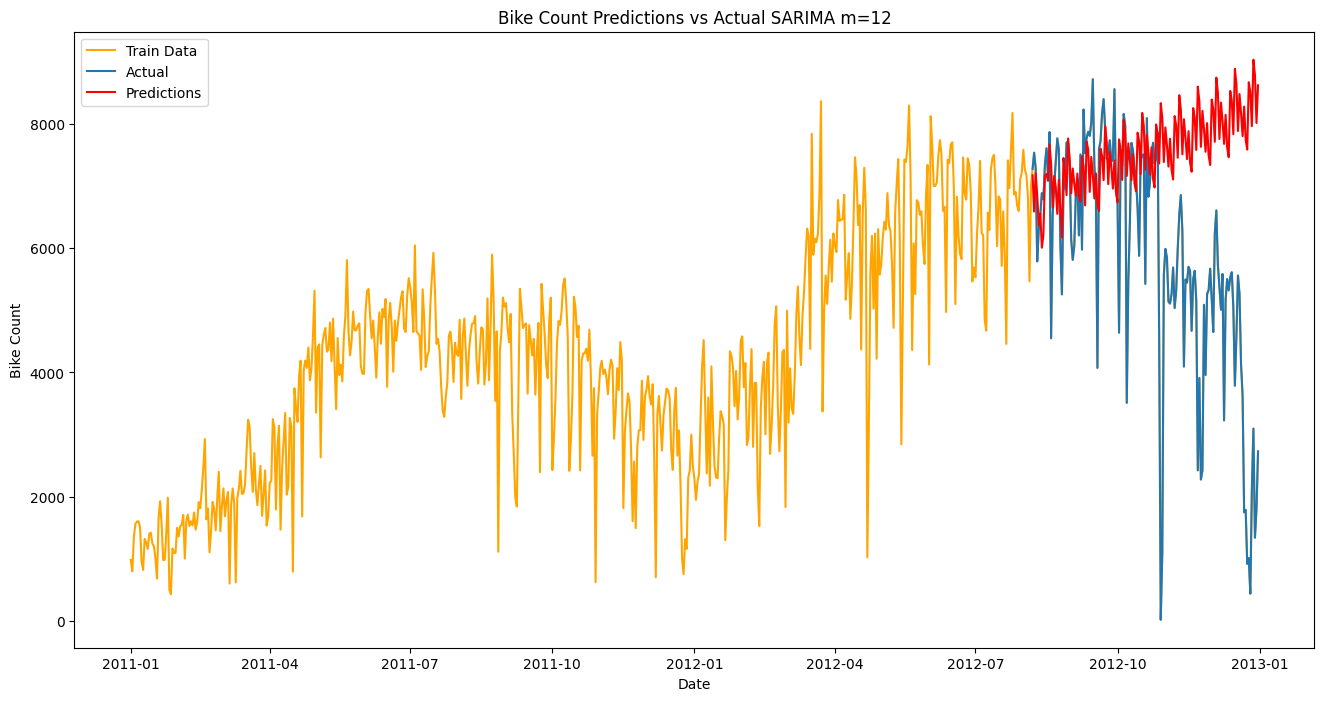

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Bike Count Predictions vs Actual SARIMA m=12')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df.index,count, label='Train Data', color='orange')
plt.plot(test_data.index, np.exp(test_data.values), label='Actual')
plt.plot(test_data.index, predictions3, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(np.exp(test_data), predictions3))
mae = mean_absolute_error(np.exp(test_data), predictions3)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2776.1927379388007
MAE: 1944.415748510482


Based on the RMSE and MAE, m = 12 is more suitable than m = 7. Now try to consider external factors using **SARIMAX**

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
external_factors = df[['temp', 'hum', 'windspeed']]
ex_train = external_factors[:len(train_data)]
ex_test = external_factors[len(train_data):]

In [ ]:
print(ex_train.shape)
print(ex_test.shape)

(584, 3)
(147, 3)


In [ ]:
SARIMAX_model = pm.auto_arima(
       train_data['log_cnt'],
       exogenous=ex_train[['temp', 'hum', 'windspeed']],  # Include exogenous variables
       start_p=1,
       start_q=1,
       max_p=3,
       max_q=3,
       m=12,  # Seasonal period
       start_P=0,
       seasonal=True,
       d=1,
       D=1,
       trace=True,
       error_action='ignore',
       suppress_warnings=True
   )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=798.186, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=569.791, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.88 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=733.588, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=504.754, Time=0.98 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=10.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=574.665, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=470.737, Time=1.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=526.307, Time=0.46 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.76 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.52 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=428.026, Time=1.19 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=498.958, Tim

In [ ]:
SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  584
Model:             SARIMAX(3, 1, 3)x(2, 1, [], 12)   Log Likelihood                -161.326
Date:                             Fri, 22 Nov 2024   AIC                            340.652
Time:                                     08:35:40   BIC                            379.779
Sample:                                 01-01-2011   HQIC                           355.917
                                      - 08-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4139      0.045    -31.251      0.000      -1.503      -1.325
ar.L2         -0.5085      0.068     -7.463      0.000      -0.642      -0.375
ar.L3          0.1979      0.041      4.868      0.000       0.118       0.278
ma.L1          0.7788      0.029     26.982      0.000       0.722       0.835
ma.L2         -0.6563      0.031    -21.416      0.000      -0.716      -0.596
ma.L3         -0.9281      0.027    -34.768      0.000      -0.980      -0.876
ar.S.L12      -0.6645      0.034    -19.532      0.000      -0.731      -0.598
ar.S.L24      -0.3097      0.031    -10.104      0.000      -0.370      -0.250
sigma2         0.1004      0.003     31.851      0.000       0.094       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              1172.47
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -1.44
Prob(H) (two-sided):                  0.37   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions4 = np.exp(SARIMAX_model.predict(n_periods=len(test_data),exogenous=ex_test[['temp', 'hum', 'windspeed']]))

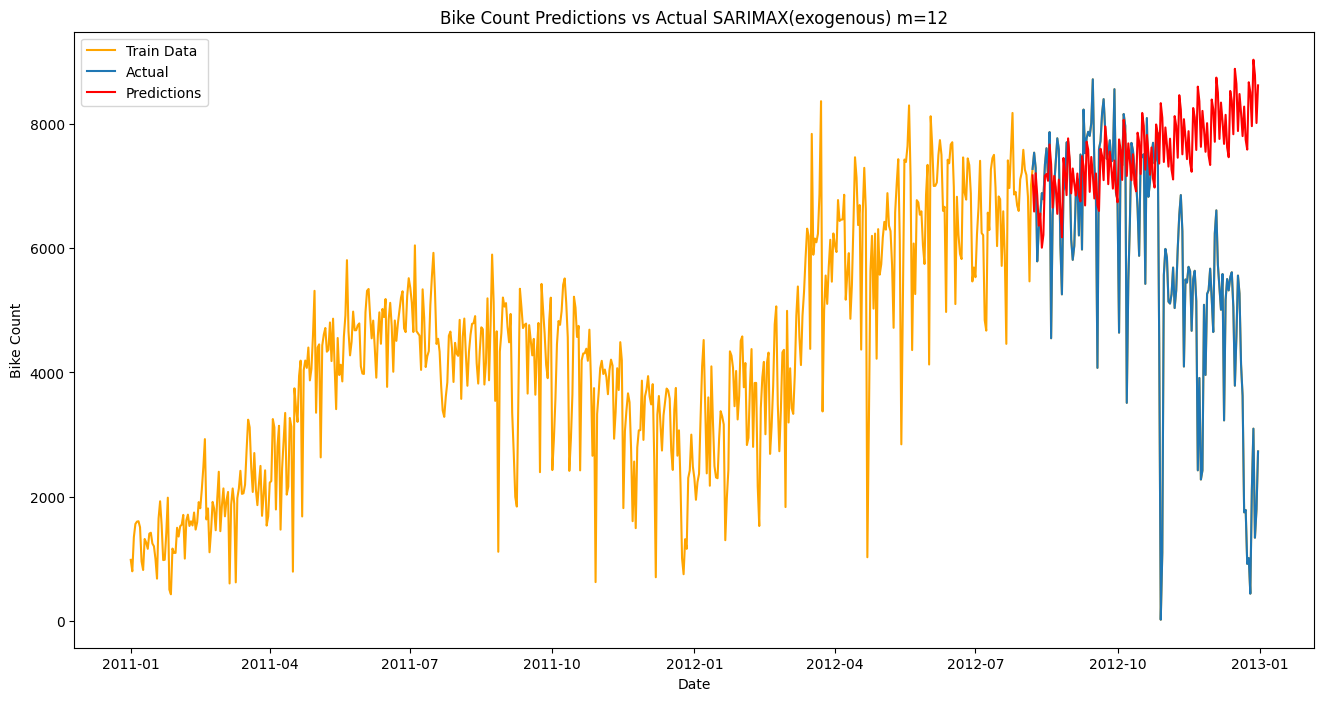

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Bike Count Predictions vs Actual SARIMAX(exogenous) m=12')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df.index,count, label='Train Data', color='orange')
plt.plot(test_data.index, np.exp(test_data.values), label='Actual')
plt.plot(test_data.index, predictions4, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(np.exp(test_data), predictions4))
mae = mean_absolute_error(np.exp(test_data), predictions4)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2776.1927379388007
MAE: 1944.415748510482


Consider other events such as weather, weekends and holiday as external factors in SARIMAX

In [ ]:
external_factors = df[['temp', 'hum', 'windspeed','holiday','workingday','weathersit']]
ex_train = external_factors[:len(train_data)]
ex_test = external_factors[len(train_data):]

In [ ]:
SARIMAX_model2 = pm.auto_arima(
       train_data['log_cnt'],
       exogenous=ex_train[['temp', 'hum', 'windspeed','holiday','workingday','weathersit']],  # Include exogenous variables
       start_p=1,
       start_q=1,
       max_p=3,
       max_q=3,
       m=12,  # Seasonal period
       start_P=0,
       seasonal=True,
       d=1,
       D=1,
       trace=True,
       error_action='ignore',
       suppress_warnings=True
   )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.74 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=798.186, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=569.791, Time=1.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=733.588, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=504.754, Time=1.02 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.43 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=574.665, Time=0.40 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=470.737, Time=1.10 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=526.307, Time=0.45 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=14.74 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.28 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=428.026, Time=1.21 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=498.958, Tim

In [ ]:
SARIMAX_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  584
Model:             SARIMAX(3, 1, 3)x(2, 1, [], 12)   Log Likelihood                -161.326
Date:                             Fri, 22 Nov 2024   AIC                            340.652
Time:                                     09:05:34   BIC                            379.779
Sample:                                 01-01-2011   HQIC                           355.917
                                      - 08-06-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4139      0.045    -31.251      0.000      -1.503      -1.325
ar.L2         -0.5085      0.068     -7.463      0.000      -0.642      -0.375
ar.L3          0.1979      0.041      4.868      0.000       0.118       0.278
ma.L1          0.7788      0.029     26.982      0.000       0.722       0.835
ma.L2         -0.6563      0.031    -21.416      0.000      -0.716      -0.596
ma.L3         -0.9281      0.027    -34.768      0.000      -0.980      -0.876
ar.S.L12      -0.6645      0.034    -19.532      0.000      -0.731      -0.598
ar.S.L24      -0.3097      0.031    -10.104      0.000      -0.370      -0.250
sigma2         0.1004      0.003     31.851      0.000       0.094       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              1172.47
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -1.44
Prob(H) (two-sided):                  0.37   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions5 = np.exp(SARIMAX_model.predict(n_periods=len(test_data),exogenous=ex_test[['temp', 'hum', 'windspeed','holiday','workingday','weathersit']]))

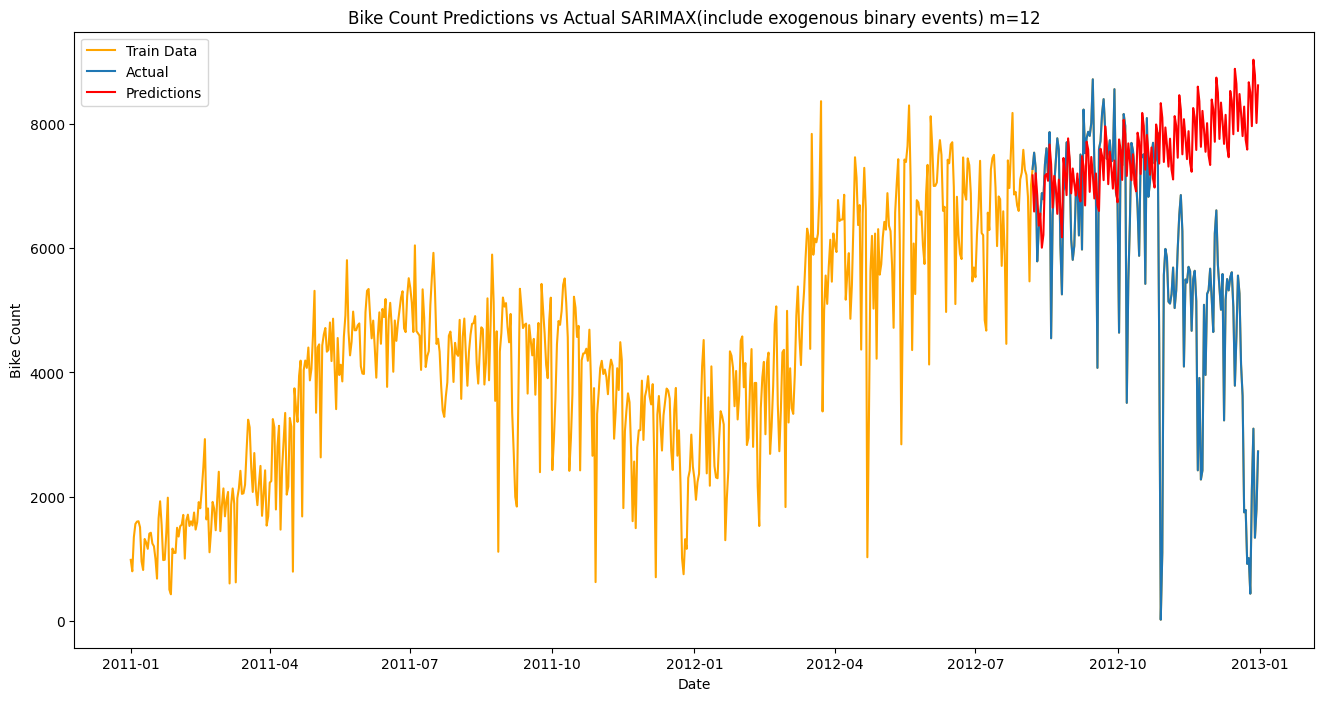

In [ ]:
plt.figure(figsize=(16, 8))  # Adjust figure size as needed
plt.title('Bike Count Predictions vs Actual SARIMAX(include exogenous binary events) m=12')
plt.xlabel('Date')
plt.ylabel('Bike Count')
plt.plot(new_df.index,count, label='Train Data', color='orange')
plt.plot(test_data.index, np.exp(test_data.values), label='Actual')
plt.plot(test_data.index, predictions5, label='Predictions', color='red')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(np.exp(test_data), predictions5))
mae = mean_absolute_error(np.exp(test_data), predictions5)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2776.1927379388007
MAE: 1944.415748510482
